# Experimentos Unitários com Motes Estáticos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle


def plot_network(
    points: list[tuple[float, float]],
    region: tuple[float, float, float, float],
    radius: float,
    interference_radius: float
    ) -> None:
    """
    Plota uma rede de nós com dois discos concêntricos para cada nó:
    - Disco de comunicação (menor, verde)           - raio = ``radius``
    - Disco de interferência (maior, cinza-claro)   - raio = ``interference_radius``

    Conexões (arestas) são traçadas **apenas** quando a distância
    entre dois nós é menor ou igual a ``radius``.

    Parâmetros
    ----------
    points : list[tuple[float, float]]
        Lista de coordenadas (x, y) dos nós.
    region : tuple[float, float, float, float]
        Retângulo de visualização na forma (x_min, y_min, x_max, y_max).
    radius : float
        Raio de comunicação do nó (disco interno - verde).
    interference_radius : float
        Raio de interferência do nó (disco externo - cinza).  
        Deve ser ≥ ``radius``.
    """
    if interference_radius < radius:
        raise ValueError("interference_radius deve ser maior ou igual a radius")

    fig, ax = plt.subplots(figsize=(10, 8))

    # ~~~ Configuração do plot ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    ax.set_xlim(region[0], region[2])
    ax.set_ylim(region[1], region[3])
    ax.set_aspect("equal")
    ax.grid(True, linestyle="--", alpha=0.7)
    ax.set_title(
        f"Rede com {len(points)} nós "
        f"(raio comunicação = {radius}, raio interferência = {interference_radius})"
    )

    # região retangular
    ax.add_patch(
        plt.Rectangle(
            (region[0], region[1]),
            region[2] - region[0],
            region[3] - region[1],
            fill=False,
            linestyle="--",
            edgecolor="red",
            linewidth=1,
        )
    )

    # ~~~ Arestas de comunicação ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            d = np.hypot(points[i][0] - points[j][0],
                         points[i][1] - points[j][1])
            if d <= radius:
                ax.plot(
                    [points[i][0], points[j][0]],
                    [points[i][1], points[j][1]],
                    color="#EE0A0A",
                    linewidth=1,
                    alpha=0.7,
                )

    # ~~~ Discos de interferência (maiores – cinza) + comunicação (menores – verde) ~
    for (x, y) in points:
        # disco de interferência (desenhado primeiro)
        ax.add_patch(
            Circle(
                (x, y),
                interference_radius,
                facecolor="lightgray",
                edgecolor="gray",
                alpha=0.25,
                linewidth=1.0,
            )
        )
        # disco de comunicação (desenhado por cima)
        ax.add_patch(
            Circle(
                (x, y),
                radius,
                facecolor="#4ECDC4",   # verde-água
                edgecolor="green",
                alpha=0.35,
                linewidth=1.0,
            )
        )

    # ~~~ Nós (marcadores) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    for i, (x, y) in enumerate(points):
        ax.plot(x, y, "o", markersize=8, color="gray")
        ax.text(x, y, str(i+1), color="black",
                ha="center", va="center", fontsize=8)

    plt.show()

In [2]:
def overwrite_json_input_file(
    points: list[tuple[float, float]],
    region: tuple[float, float, float, float],
    radius: float,
    interference_radius: float
) -> dict:
    """
    Gera um dicionário no formato esperado para o arquivo de entrada JSON da simulação.

    Parameters:
    - points: lista de tuplas (x, y) representando posições dos motes
    - region: tupla (x_min, y_min, x_max, y_max) definindo a região da simulação
    - radius: raio de comunicação dos motes
    - interference_radius: raio de interferência dos motes

    Returns:
    - Um dicionário com a estrutura especificada para o modelo de simulação
    """

    fixed_motes = []

    for i, position in enumerate(points):
        mote = {
            "position": list(position),
            "name": "server" if i == 0 else f"client{i}",
            "sourceCode": "root.c" if i == 0 else "node.c"
        }
        fixed_motes.append(mote)

    simulation_model = {
        "simulationModel": {
            "name": "single-experiment-sim-lab",
            "duration": 60,
            "radiusOfReach": radius,
            "radiusOfInter": interference_radius,
            "region": list(region),
            "simulationElements": {
                "fixedMotes": fixed_motes,
                "mobileMotes": []
            }
        }
    }

    return simulation_model


In [3]:
experiments = [
    {           
        "points":[
            (0,0),
            (46,0),(80,0),(120,0),(160,0),
            (0,46),(0,80),(0,120),(0,160)
        ],
        "region":(-100,-100,240,240),
        "radius": 50,
        "interf": 60
    },
    {           
        "points":[
            (0,0),
            (40,0),(80,0),(120,0),(160,0),
            (0,40),(0,80),(0,120),(0,160)
        ],
        "region":(-100,-100,240,240),
        "radius": 50,
        "interf": 60
    },
    {
        "points":[
            (0,0),
            (21.72, 19.18),
            (22.97, 56.05), (31.25, 78.82), (57.89, 104.1), (91.89, 109.1),
            (62.97, 7.9), (88.25, 12.24), (118.31, 31.7), (132.5, 57.44)
        ],
        "region":(-100,-100,240,240),
        "radius": 45,
        "interf": 55  
    },
    {
        "points":[
            (0,0),
            (21.72, 19.18),
            (22.97, 56.05), (31.25, 78.82), (57.89, 104.1), (91.89, 109.1),
            (62.97, 7.9), (88.25, 12.24), (118.31, 31.7), (132.5, 57.44),
            (115, 91)
        ],
        "region":(-100,-100,240,240),
        "radius": 45,
        "interf": 55
    }
]

## Lista todos experimentos prédefinidos

Experiment 0


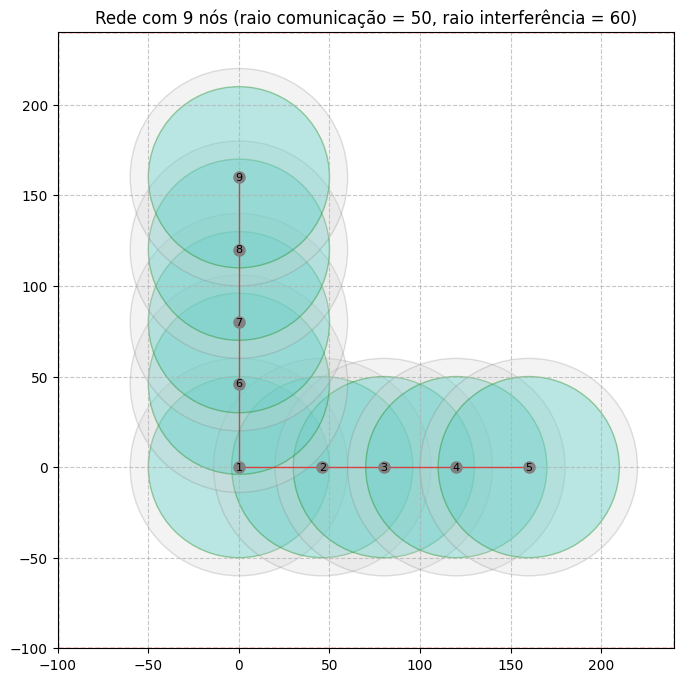

Experiment 1


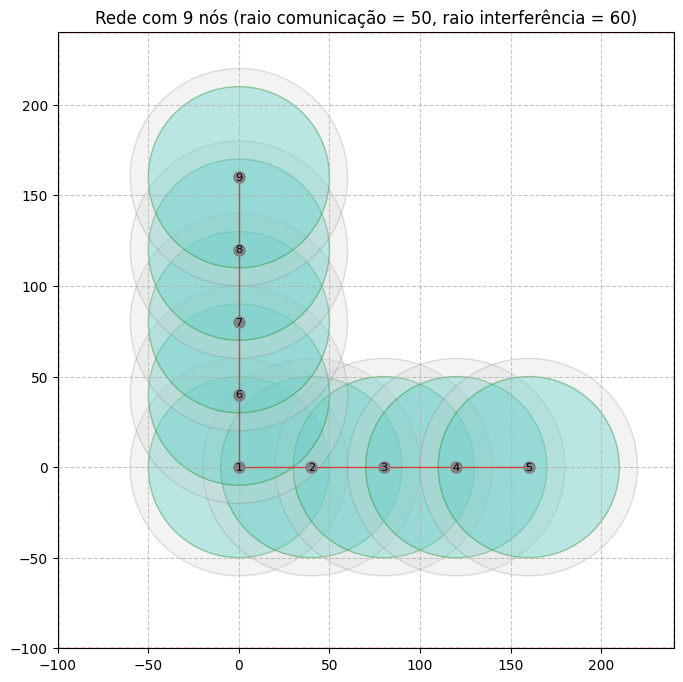

Experiment 2


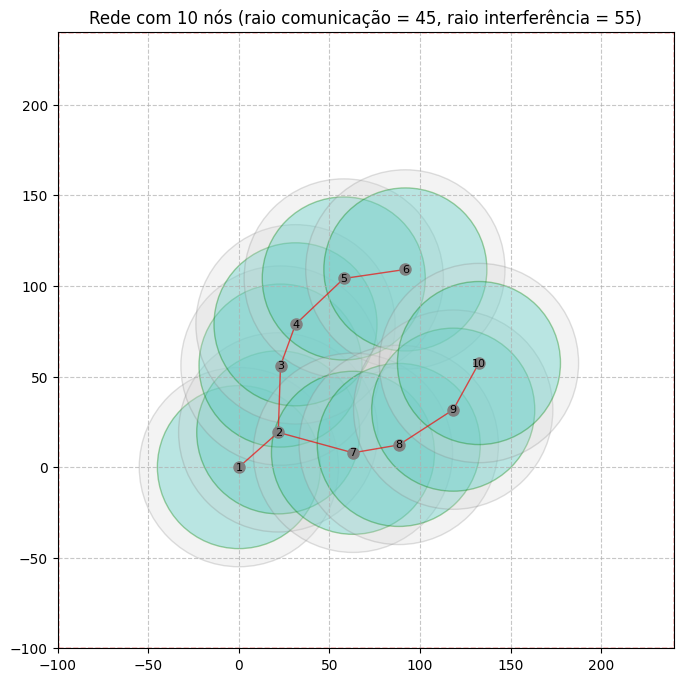

Experiment 3


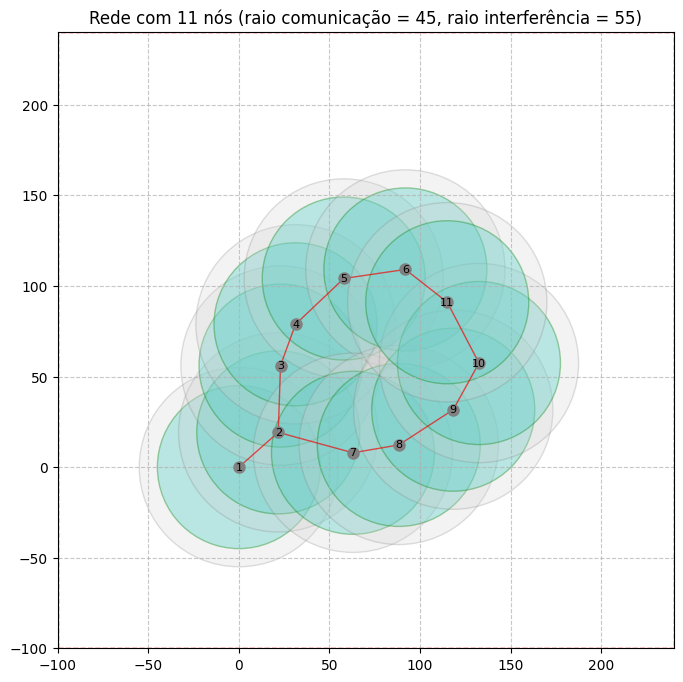

In [4]:
for i, exp in enumerate(experiments):
    print(f"Experiment {i}")
    plot_network(exp["points"], exp["region"], exp["radius"], exp["interf"])

## Utilize esta parte para gerar o próximo experimento a ser executado

Experiment 3


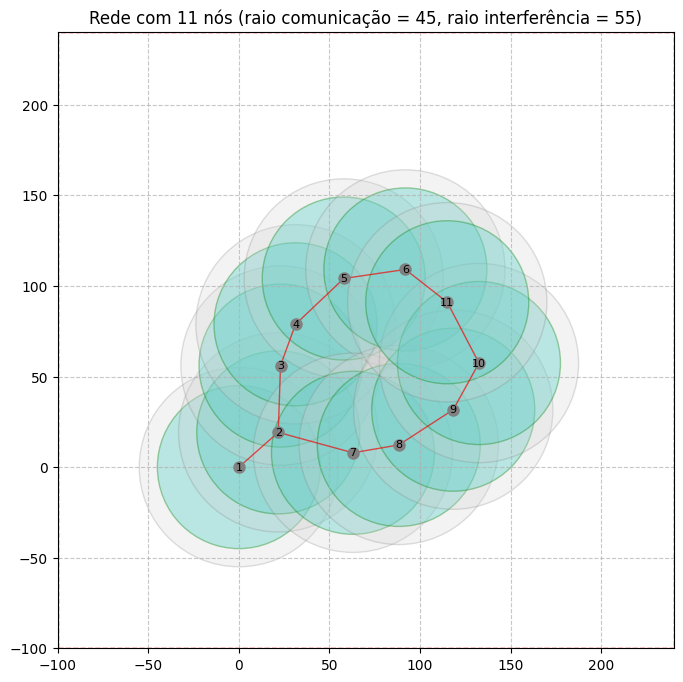

File output\simulation.xml generated successfully!


In [5]:
import json

exp_index = 3
exp = experiments[exp_index]
print(f"Experiment {exp_index}")
plot_network(exp["points"], exp["region"], exp["radius"], exp["interf"])

with open("data/inputExample.json", "w") as f:
    json.dump(overwrite_json_input_file(exp["points"], exp["region"], exp["radius"], exp["interf"]), f, indent=2)
 
# Com isto não precisa do passo 3 do README   
!py main.py
